In [9]:
#https://www.sallys.space/blog/2018/05/30/svm/
## 5.1 선형 SVM분류##
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
#메모리 많이 씀

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] #꽃잎 길이, 꽃잎 넓이
Y = (iris["target"] == 2).astype(np.float64) #Iris-Virginica

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")) #힌지로스 적용
])

svm_clf.fit(X, Y)
svm_clf.predict([[5.5, 1.7]]) #1번 클래스라고 예측

array([1.])

In [12]:
from sklearn.linear_model import SGDClassifier
#속도는 느리지만 온라인학습 가능

m = len(X)
C = 1

sgd_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_sgd", SGDClassifier(loss="hinge", alpha=1/(m*C))) #힌지로스 적용
])
sgd_clf.fit(X, Y.ravel())
sgd_clf.predict([[5.5, 1.7]])

array([1.])

In [20]:
## 5.2 비선형 SVM분류##
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, Y = make_moons(n_samples=100, noise=0.15, random_state=42) #두개의 반달 모양 데이터셋 만듬

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)), #비선형 데이터를 분리하기위해 특성추가
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", max_iter=5000))
])

polynomial_svm_clf.fit(X, Y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', max_iter=5000))])

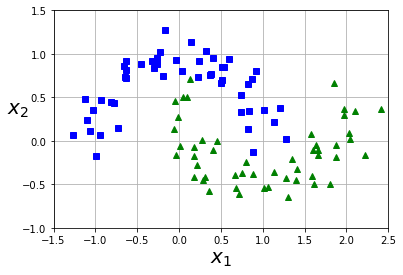

In [21]:
#반달모양 데이터셋 분류
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

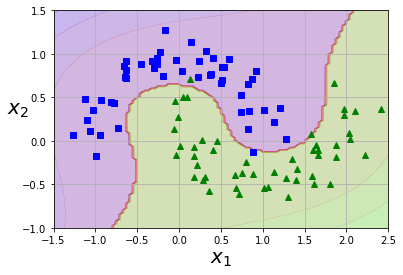

In [23]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])


plt.show()

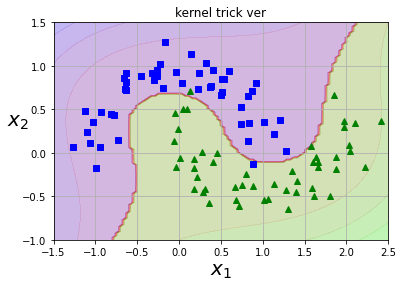

In [28]:
##5.2.1다항식커널##
"특성추가 -> 느려짐, 커널트릭사용 -> 실제로는 특성추가 안하고 특성추가 한 것과 같은 결과 -> 빠름"
from sklearn.svm import SVC
poly_kernel_svm_clf  = Pipeline([
    ("Scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)) #coef0은 모델이 높은 차수와 낮은 차수에 얼마나 영향을 받을지 설정
])
poly_kernel_svm_clf.fit(X, Y)

plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title("kernel trick ver")

plt.show()

In [29]:
##5.2.3가우시안 RBF커널##
rgf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001)) #gamma는 샘플이 영향을 미치는 정도, 높을수록 영향력 높아짐
])
rgf_kernel_svm_clf.fit(X, Y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

In [30]:
##5.3SVM회귀##
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, d) #입실론으로 도로의 폭 조절
svm_reg.fit(X, Y)

LinearSVR(epsilon=1.5)

In [31]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1) #비선형회귀
svm_poly_reg.fit(X, Y)

SVR(C=100, degree=2, kernel='poly')